# 基礎シミュレーション①
「ノイズとは何か？」— SNRとスペクトル

## 1. 導入テキストセル
Introduction: ノイズとは何か？  
信号処理の第一歩は、**信号（Signal）とノイズ（Noise）** を区別することから始まります。現実世界のデータには必ずノイズが含まれていますが、それをどう評価し、どう可視化すべきかを学びましょう。  
**数理モデル：観測信号の構成**  
私たちが手にする観測信号 $x(t)$ は、多くの場合、目的の信号 $s(t)$ と不要なノイズ $n(t)$ の足し算で表されます。  
$$x(t) = s(t) + n(t)$$  
**指標：SNR (Signal-to-Noise Ratio)**  
ノイズがどの程度含まれているかを表す最も重要な指標が SNR（信号対雑音比） です。  
$$SNR_{\text{dB}} = 10 \log_{10} \left( \frac{P_{\text{signal}}}{P_{\text{noise}}} \right)$$  
ここで $P$ はそれぞれの平均パワーを表します。  
+ SNRが高い（正の値）: 信号がノイズより大きく、クリーンな状態。
+ SNRが低い（負の値）: ノイズが信号より大きく、埋もれている状態。

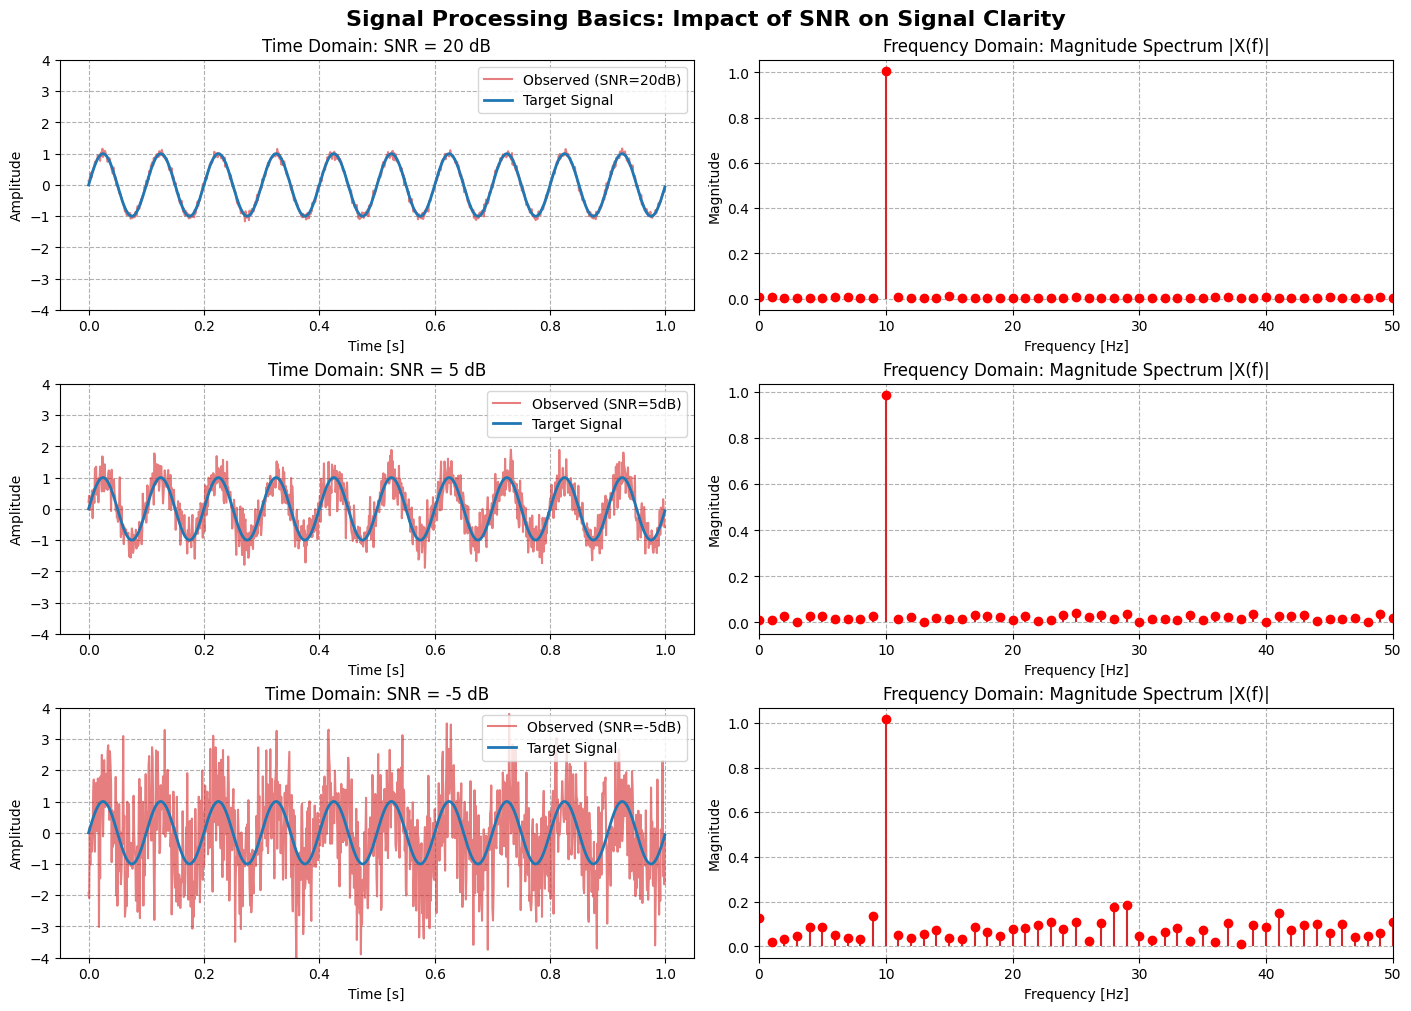

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Signal Generation Parameters ---
fs = 1000          # Sampling frequency [Hz]
T = 1.0            # Duration [s]
t = np.linspace(0, T, int(fs * T), endpoint=False)
f_sig = 10         # Target signal frequency [Hz]

# Pure Signal s(t): A clean sine wave
s = np.sin(2 * np.pi * f_sig * t)

# --- 2. Function to add Noise based on target SNR ---
def add_noise(signal_source, snr_db): # SNR = 10 log10 (signal_power / noise_power)
    p_signal = np.mean(signal_source**2)
    p_noise = p_signal / (10**(snr_db / 10))
    noise = np.random.normal(0, np.sqrt(p_noise), len(signal_source))
    return signal_source + noise

# --- 3. Simulation with 3 SNR levels ---
np.random.seed(0)   # 固定乱数（結果を再現できるように）
snr_levels = [20, 5, -5]
results = {snr: add_noise(s, snr) for snr in snr_levels}

# --- 4. Visualization (Time Domain & Frequency Domain) ---
fig, axes = plt.subplots(3, 2, figsize=(14, 10), constrained_layout=True)
fig.suptitle("Signal Processing Basics: Impact of SNR on Signal Clarity", fontsize=16, fontweight='bold')

for i, snr in enumerate(snr_levels):
    x = results[snr]

    # --- Left: Time Domain Plot ---
    axes[i, 0].plot(t, x, label=f"Observed (SNR={snr}dB)", color='tab:red', alpha=0.6)
    axes[i, 0].plot(t, s, label="Target Signal", color='tab:blue', lw=2)
    axes[i, 0].set_title(f"Time Domain: SNR = {snr} dB")
    axes[i, 0].set_xlabel("Time [s]")
    axes[i, 0].set_ylabel("Amplitude")
    axes[i, 0].grid(True, linestyle='--')
    axes[i, 0].legend(loc='upper right')
    axes[i, 0].set_ylim([-4, 4])

    # --- Right: Frequency Domain Plot (Spectrum) ---
    n_fft = len(x)
    freq = np.fft.fftfreq(n_fft, d=1/fs)
    # Compute Magnitude Spectrum
    X = np.abs(np.fft.fft(x)) / (n_fft / 2)

    # Plot only positive frequencies
    axes[i, 1].stem(freq[:n_fft//2], X[:n_fft//2], basefmt=" ", linefmt='tab:red', markerfmt='ro')
    axes[i, 1].set_title(f"Frequency Domain: Magnitude Spectrum |X(f)|")
    axes[i, 1].set_xlabel("Frequency [Hz]")
    axes[i, 1].set_ylabel("Magnitude")
    axes[i, 1].set_xlim([0, 50]) # Focus on 0-50Hz
    axes[i, 1].grid(True, linestyle='--')

plt.show()

---
### License & Copyright
**This software is released under the MIT License.**

<small>
Copyright (c) 2026 OGAWA Tomomi (Tokyo Denki University)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>

**Contact:** <small>to.ogawa[at]ms.dendai.ac.jp</small>